### Classification using Decision Trees
We have tried to solve the classification problem using logistic regression. One more popular category of solution are the decision trees. Decision tree is a divide-and-conquer category of algorithms which start with the entire data and try to divide the data into more homogeneous groups, these homogeneous groups are then subsequently used to predict the right output variable. 

Classification and Regression Trees (CART) can be used to perform both classification (in case the predictor variable is binary) or Regression (when dependent variable is continuous). 

When used for classification CART algorithms use impurity index like Gini - These are measure of how impure (non-homogeneous) the node is. CART creates an inverted tree where the entire dataset is at the node. 

#### Steps in Decision Tree Algorithm
1. Start with the complete dataset at the node
2. Decide the measure of impurity (Gini or Entropy), search for the predictor variable splitting basis which leads to minimum impurity. Which essentially means when this variable is used and the node is divided into two - will lead to maximum decrease in impurity. 
3. Repeat above step for till following happens:
    - All dependent variables are exhausted
    - Stopping Criteria are met: 
        - Level of tree is reached (this is a hyper-parameter in the model creation)
        - Number of observations in a node hits minimum decided (say 5% of the observations)
        - Or there is no further reduction in the Impurity Index
4. Finally rules are decided for division of the nodes which can then be used


Let us start with the generic steps for any machine-learning data at the cost of repetition:
1. Read/ Load the data
2. Split the dependent and independent variables
3. Split the data into test and train set
4. Run the model

Data to be used here is the UCI German Credit Data this dataset is publicly available at https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/.

However, for running the model we will make some changes to the data set.
<br>*Steps to use the data*:
1. Download the data from the above link
2. Open the data in excel sheet and Data Tab -> Text to Columns -> Split using Delimiters -> Select Space -> Save data as CSV file in desired location
3. Load the data in python using ```pd.read_csv()```
4. Create Column names as given in ```base_data_2.columns = [...]```
5. The original dataset has 1 and 2 has status for bad_loan and non_bad_loan we convert them into 0 and 1. This is just for the sake of ease of use. 
6. We use the selected columns to run a truncated model

*Reason for running a truncated model: Because some of the additional variables might have collinearity associated so I have removed those variables like foreign_worker and job are giving similar information. So in order to make the article of viable length I have removed perceived collinearity. You can try to run the model on the full data-set and compare your results*

In [1]:
# Read the data
import pandas as pd
import numpy as np
base_data = pd.read_csv("Datasets/german.data.csv",header = None)
#print(base_data_2.head())
#base_data_2 = pd.read_csv("~/Downloads/german.data.csv",header = None)
base_data.columns = ['checkin_acc','duration','credit_history','purpose','amount',
                      'savings_acc','present_emp_since','inst_rate',
                      'personal_status','other_debters','residing_since','property','age','inst_plans','housing',
                      'num_credits','job','dependent_count','telephone','foreign_worker','status']
base_data['status'] = np.where(base_data['status']==1,0,1)
base_data.head()

selected_columns = ['checkin_acc', 'duration', 'credit_history', 'amount', 'savings_acc',
       'present_emp_since', 'inst_rate', 'personal_status', 'residing_since',
       'age', 'inst_plans', 'num_credits', 'job', 'status']
base_data = base_data[selected_columns]

base_data.head()

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


Now that we have downloaded/ extracted the truncated dataset let us try to understand what each of these columns mean. 
<br>You can find the description of the original dataset here: 
<br>https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/ 
<br>In the file named ```german.doc```. There is a table in the end which we will come to when we try to optimize our model. 


Let us try to describe the data first to understand what is there in the data as there are a lot of codes in the data like - A11, A12 in ```checckin_acc``` column. 

***DESCRIPTION OF THE DATA SET***
<img src = "Images/Data_Description.png" width = 800>

In [2]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


As we can see there are 7 categorical variables and 7 numerical variables in the data-set. There are total 1000 data points in the dataset. 
<br>Our output variable is Status whose value 
- **1: Bad Credit (Liable to Default)** 
- **0: Good Credit (Not Liable to Default)**

In [3]:
#Splitting data into Decision and Independent variables and then encoding the data

X_features = list(base_data.columns)
X_features.remove('status')
X_features

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

In [4]:
#Conversion of data into dummy variables.
Y_variable = base_data.status
X_variable = pd.get_dummies(base_data[X_features],drop_first = True)
X_variable.head()

,duration,amount,inst_rate,residing_since,age,num_credits,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,credit_history_A31,...,present_emp_since_A74,present_emp_since_A75,personal_status_A92,personal_status_A93,personal_status_A94,inst_plans_A142,inst_plans_A143,job_A172,job_A173,job_A174
0,6,1169,4,4,67,2,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,12,2096,2,3,49,1,0,0,1,0,...,1,0,0,1,0,0,1,1,0,0
3,42,7882,2,4,45,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
4,24,4870,3,4,53,2,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


As we know ```get_dummies``` method of pandas will only encode the ```object``` type of data and ```drop_first``` creates K-1 categories from K levels of categorical data. For example as is evident from the data-description table above our ```checkin_acc``` has 4 levels. However, in this case ```get_dummies``` method drops the first level. 

#### Building the Model
Once we have preprocessed the data we can start building the model. We will split the data into Train and Test set and then use the same to run our decision tree classifier. 

In [5]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X_variable,Y_variable, test_size = 0.3, random_state = 1)

#### Hyper-parameters of Decision Tree algorithm:
As with every model there are hyper-parameters associated with ```DecisionTreeClassifier``` we will discuss some of them:
1. **criterion (String)**: Uses the impurity criteria available options are: ```Gini and entropy```
2. **max_depth (Integer)**: Used to define the maximum depth the tree can take. If nothing is given then other hyper-parameters like ```min_samples``` will override. 
3. **min_samples (Integer/ Float)**: Minimum samples beyond which split doesn't happen. Default is 2 (means if a node has 2 samples left this node will not be split further).
    - Integer Values: Means absolute count of samples beyond which split stops
    - Float Values: Means % of the total dataset left at which splitting stops
4. **in_sample_leaf (Integer/ Float)**: Minimum number of samples which are required at a leaf-node. Which means if a leaf node (the final nodes) are having < ```in_sample_leaf``` parameter then the leaf-node will not be created.

We will be using only 2 hyper-parameters for now: ```criterion``` and ```max_depth```

In [6]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion = 'gini',max_depth = 3)

In [7]:
clf_tree.fit(train_X,train_Y)

DecisionTreeClassifier(max_depth=3)

In [8]:
from sklearn import metrics
tree_predict = clf_tree.predict(test_X)
metrics.roc_auc_score(test_Y,tree_predict)

0.6299174092588569

We get the AUC_SCORE of 0.63 which is worse off than the first model we created using Logistic regression. Read more about the same here: 
<Link>
    
Let us look at our decision tree model and then start evaluating the accuracy and other parameters associated. 

In [9]:
import matplotlib.pyplot as plt

[]

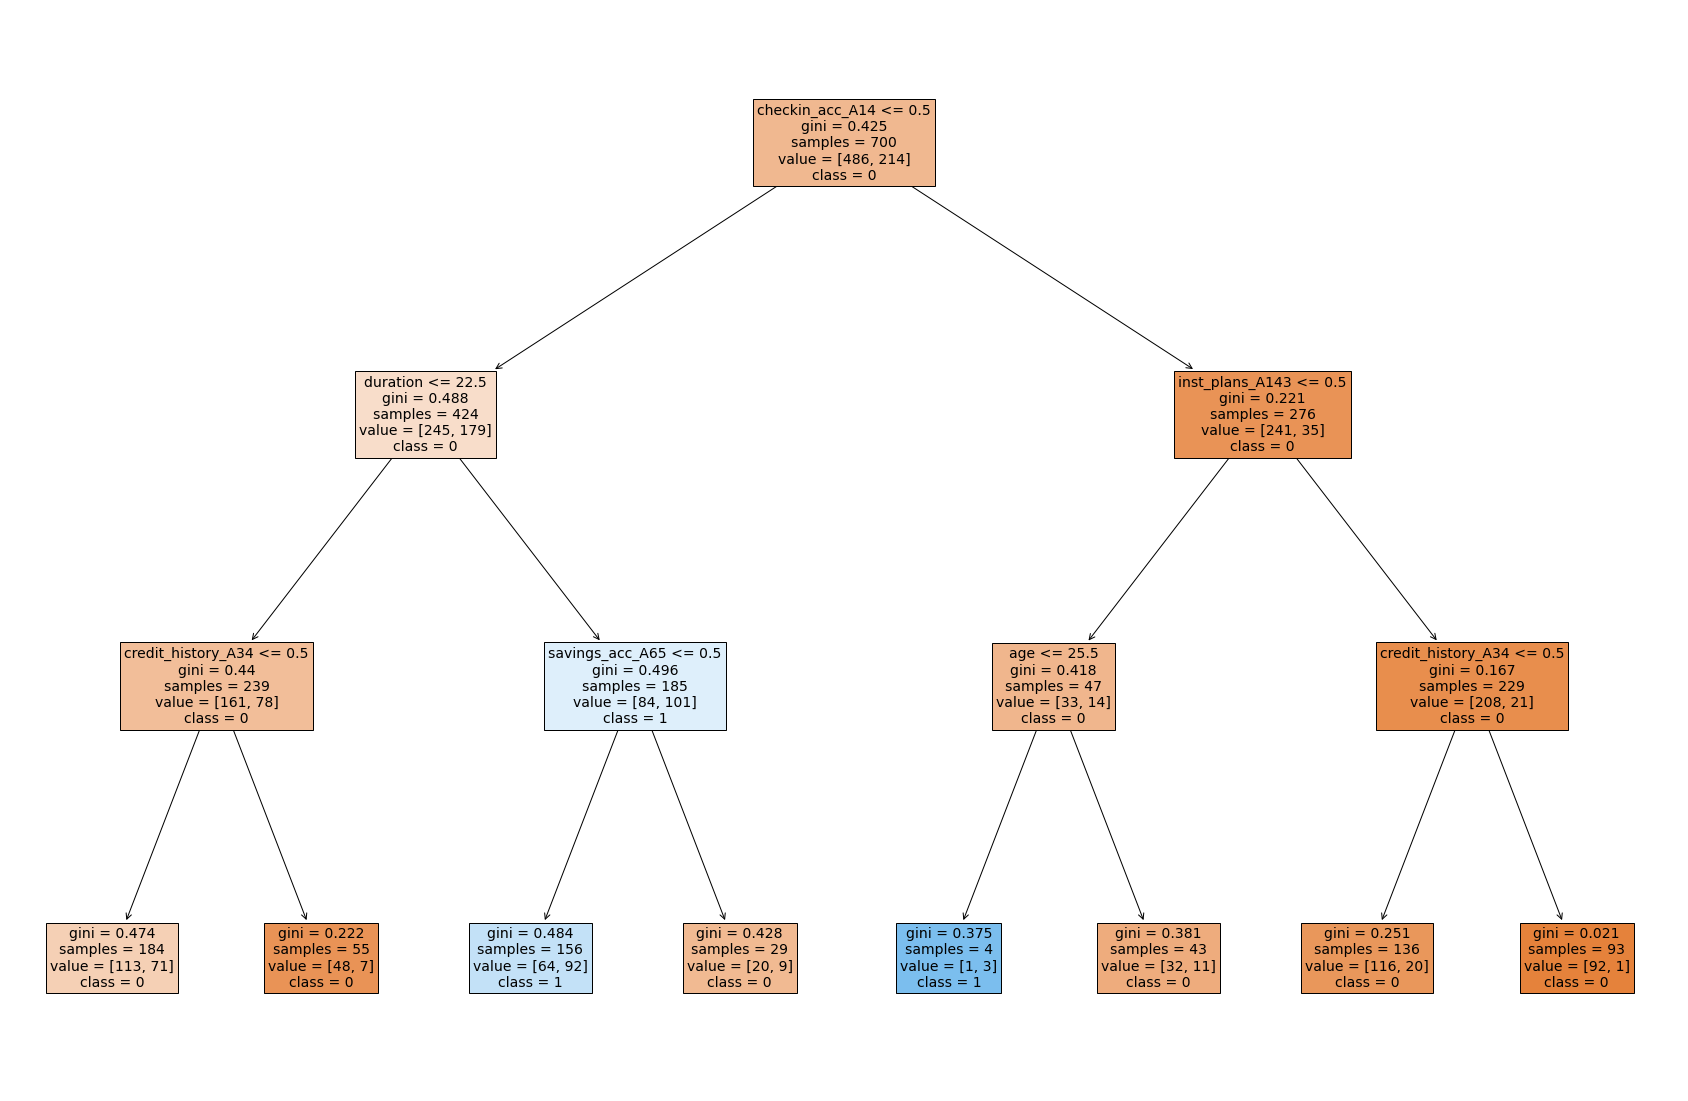

In [10]:
from sklearn import tree
fig = plt.figure(figsize = (30,20))
tree.plot_tree(clf_tree,feature_names = X_variable.columns,
               class_names = [str(x) for x in np.unique(train_Y)],filled = True,fontsize = 14)
plt.plot()

#### Reading the Decision Tree
While this representation of the Decision Tree might look pretty intuitive, there are a few technical details which are hidden in the tree and which we also need to understand. There are a few crucial points to be covered here:
Let me explain the same via a picture:

<img src = "Images/Decision Tree.jpeg" width = 600>

Some of the rules which can be seen in the decision tree above can be:
1. If someone doesn't have a checking_account type as A14 (Remember this is a categorical variable and value <0.5 means 0 which implies checking account type is NOT A14)
    - Then doesn't have installment plan as A143 (again a categorical variable)
       - The Credit History type is not A34
           - Has a high probability of having a Good Credit Score as this leaf has 92 Good Credits and 1 Bad Credits
           
Let us look at these parameters from Business Perspective:
- **A14 - No Checking account**: (This is false in the above path means the customer has a Checking Account): Implies the customer maintains a checking account with some balance. 
- **A143 - No installment plan**: (This is again False): The customer has some or the other installment plan means the customer has a installment plan either with a bank or stores (Means may have a credible history - this variable may have a negative connotation as well)
- **A34 - Critical Credit History**: (This is again false): This means that the customer has no critical credit history. This variable now makes sense when clubbed with A143 (because the customer has no critical credit history therefore is able to maintain a balance with Stores/ Banks and thus the above variable in this particular context doesn't have a negative connotation). 

If you look at the above variable we are looking at a customer - Who has a certain checking account balance + Has a credit already existing with a bank/ store + has had no critical credit event in the past. 

If given above customer you would also easily conclude that this customer should be a good credit customer. However, in most of the cases this kind of classification might not be that intuitive as well as easy to derive. 


#### Understanding Gini Impurity Index:
Suppose you randomly pick an observation in a particular node and randomly assign label to that particular observation basis the number of each type of labels that are available on that node what is the absolute impurity in that measure. We compute the Gini Index in a sort of negative manner (A lot of machine learning algorithms end up doing this reversal of Objective functions - you translate something to opposite of maximization so as to arrive at a minimization problem). 

<center>1 - $p_1^2$ - $p_2^2$ ... </center>

Where $p_1 , p_2$ etc. are probability of classifying an observation into 1st 2nd class respectively.

If you look at the example above closely this is very similar to a variance formula (Squaring and all...)

If we have to see it via an example:
- Take the first node there are 486 good credits and 214 bad credits out of 700 observations
- Probability of a good credit is given by $\frac{486}{700}$ and Probability of bad credit = $\frac{214}{700}$
- Gini Index is given by 1 - $(\frac{486}{700})^2$ - $(\frac{214}{700})^2$

Which is 0.4245 rounded to 0.425 in our decision Tree. If we had a single type of observation on any node then we would have Gini Index = 0 because there is no impurity in the data. 

An theoretically the maximum value of Gini Index can be 1 when there are may types of classification and all the observations are equally distributed then each probability starts approaching Zero. 
<br>However, in case of Binary classification the maximum value Gini Index can take is 0.5 at any node where each of the classifications are equally distributed.

This is very evident at the leaf nodes wherever our Gini Index is close to 0.5 the observations are more equitably distributed. 

### Then why did this model stop at such bad Gini Indices:
Well, that is because we gave the number of nodes as 3 if we do not restrict the number of nodes the Gini Index is expected to improve. Also, note because the Gini Index is a squared function a small improvement actually is emanating from a big change in the distribution of good and bad credit at a particular node. 

I ran the same decision tree with ```max_depth = 5``` following screen-shot tells that the Gini Index has a lot better values: 
<img src = "Images/Gini Index.png" width = 800>

We see that the Gini Index has values a lot lower than 0.25 (except for two nodes, this will also further improve with increase in the depth of the tree).

Apart from Gini Index there are other criteria to measure the accuracy of the tree ... **ENTROPY** 

### Entropy as a measure of impurity
Apart from Gini Index, another measure for impurity measurement is Entropy which is given by:
<center> Entropy(k) = -$\sum \limits _{j=1} ^{L} p(j|k)log_2(j|k)$ </center>

As we already discussed in order to create a tree with entropy criteria we can use the hyperparameter ```criterion``` in the tree creation. Let us run and see the results. 

In [21]:
clf_tree_entropy = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3)
clf_tree_entropy.fit(train_X,train_Y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[]

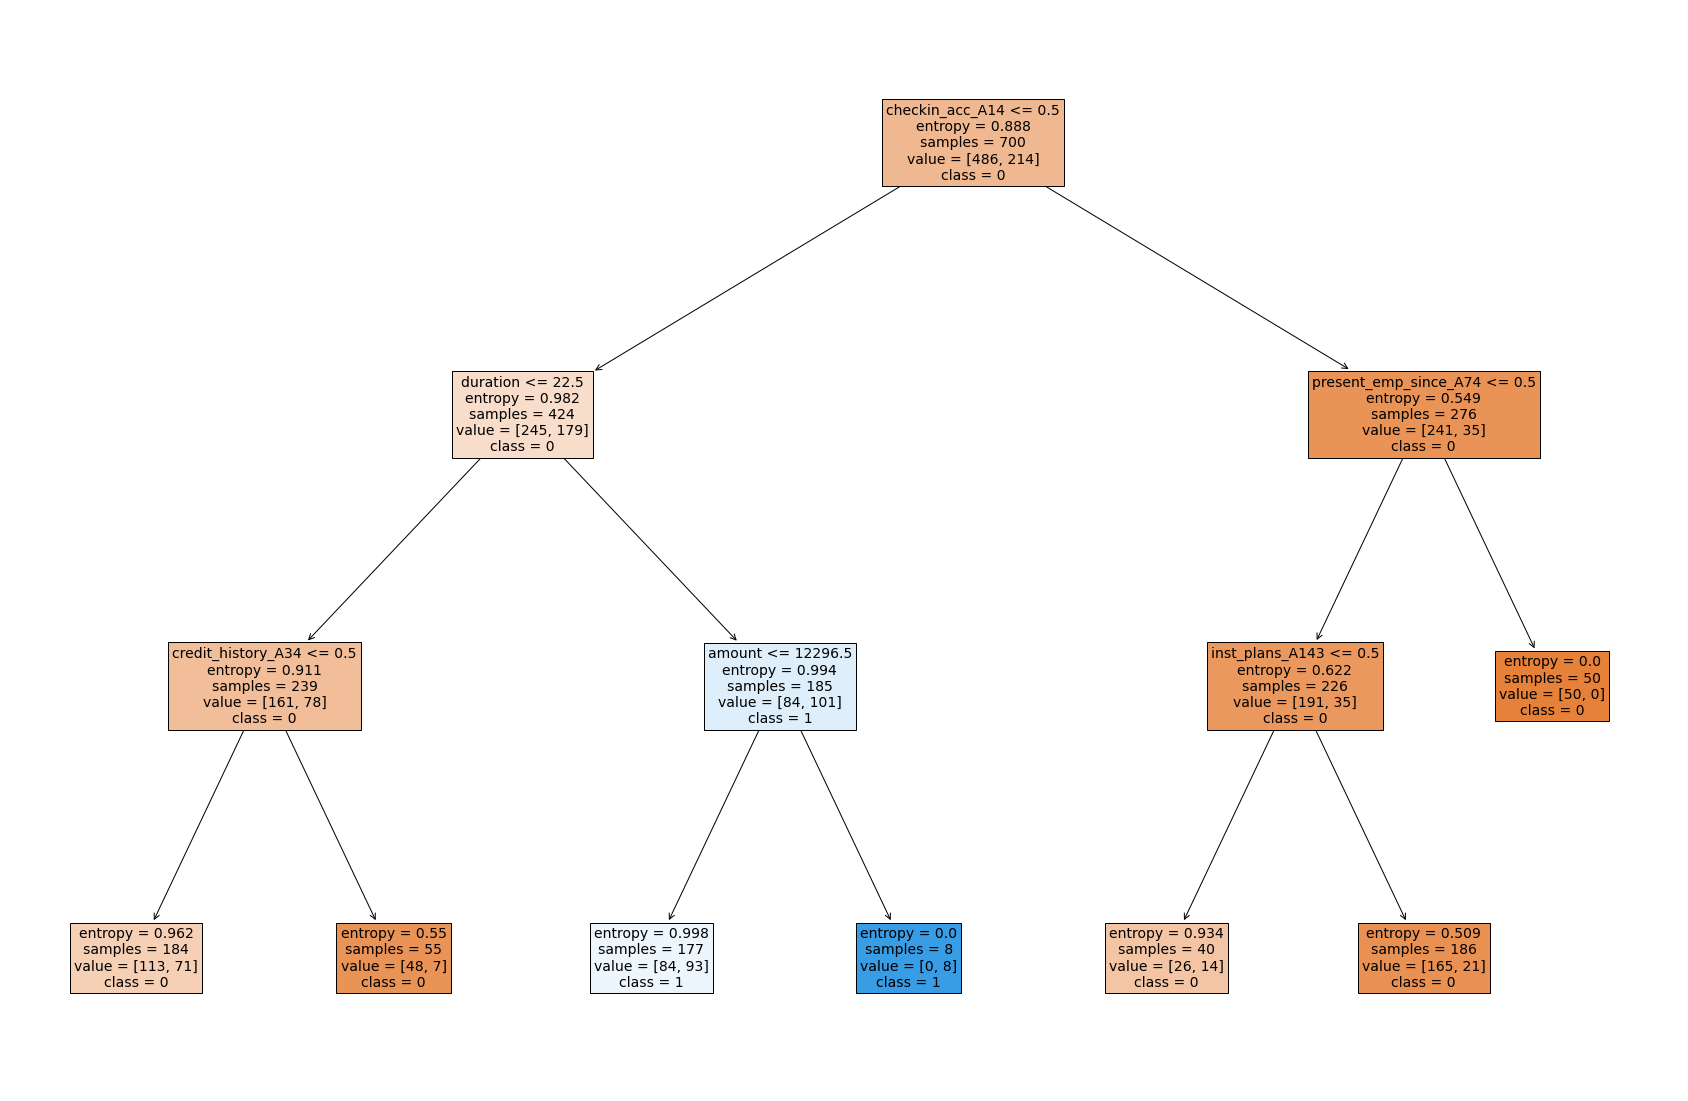

In [22]:
##Plotting the graph
fig = plt.figure(figsize = (30,20))
tree.plot_tree(clf_tree_entropy,feature_names = X_variable.columns,
               class_names = [str(x) for x in np.unique(train_Y)],filled = True,fontsize = 14)
plt.plot()

In [24]:
tree_entropy_predict = clf_tree_entropy.predict(test_X)
metrics.roc_auc_score(test_Y,tree_entropy_predict)

0.633340578135188

There is a small improvement in the ROC score from 0.62 to 0.63. However, till now we have used parameters like ```criterion and max_depth``` as per our discretion. We could use ```GridSearchCV``` in ```sklearn``` to choose the best hyperparameters for our model. This is also known as **HYPER-PARAMETER OPTIMIZATION**.

Gridsearch takes following parameters as input:
- Your model name
- Parameter List (which is basically all the options you want your model to run through)
- Cross Validation (CV): which is number of cross-validation folds for each combination of parameters. Means how many samples our data-set is divided into this might change the max_depth of the suggested model.
- Scoring - Is the parameter to define what is our model accuracy metrics. Here we use ```roc_auc```

We can extract the best score using ```best_score_``` attribute and best parameters using ```best_params_``` attribute. 

Note we are getting a lot better ROC value of 0.70 and the parameters associated are:
- Criterion - ENTROPY
- max_depth - 6

In [52]:
from sklearn.model_selection import GridSearchCV
parameter_list = [{'max_depth': range(2,15),
                  'criterion':['gini','entropy']}]

classification_tree = DecisionTreeClassifier()
classification = GridSearchCV(classification_tree,
                             parameter_list,
                             cv = 10,
                             scoring = 'roc_auc')
classification.fit(train_X,train_Y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 15)}],
             scoring='roc_auc')

In [53]:
classification.best_score_

0.6991386164855553

In [54]:
classification.best_params_

{'criterion': 'entropy', 'max_depth': 6}

This closes our discussion on solving classification problems using decision trees. There are a lot of benefits associated with Decision Trees:
1. You can actually view the decision boundaries and therefore are intuitive
2. Decision trees because do not require normalization of the data and works well with both numerical and categorical datasets


However, there are some lacuna as well associated with decision trees:
1. They are not as accurate as some of the other algorithms 
2. Small change in data-set can lead to a very different tree; so you cannot use one tree and then keep on running it forever (in that respect some of the quantitative methods are better placed)

There are techniques to improve performance of the trees - bagging, random-forest and boosting. Which we will cover some other day.

Thank you for your patience. 